In [ ]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from google.colab import files


In [ ]:
uploaded=files.upload()

Saving football Decision Tree.xlsx to football Decision Tree.xlsx


In [ ]:
df=pd.read_excel('football Decision Tree.xlsx')

In [ ]:
df1=pd.DataFrame(df)

In [ ]:
df1.head()

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,International Reputation
0,RF,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,5
1,ST,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,5
2,LW,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,5
3,GK,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,4
4,RCM,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,4


In [ ]:
df1.isna().sum()

Position                    12
Crossing                     0
Finishing                    0
HeadingAccuracy              0
ShortPassing                 0
Volleys                      0
Dribbling                    0
Curve                        0
FKAccuracy                   0
LongPassing                  0
BallControl                  0
Acceleration                 0
SprintSpeed                  0
Agility                      0
Reactions                    0
Balance                      0
ShotPower                    0
Jumping                      0
Stamina                      0
Strength                     0
LongShots                    0
Aggression                   0
Interceptions                0
Positioning                  0
Vision                       0
Penalties                    0
Composure                    0
Marking                      0
StandingTackle               0
SlidingTackle                0
GKDiving                     0
GKHandling                   0
GKKickin

In [ ]:
df1[df1['Position']!=None]

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,International Reputation
0,RF,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,5
1,ST,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,5
2,LW,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,5
3,GK,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,4
4,RCM,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18154,CM,34,38,40,49,25,42,30,34,45,43,54,57,60,49,76,43,55,40,47,38,46,46,39,52,43,45,40,48,47,10,13,7,8,9,1
18155,ST,23,52,52,43,36,39,32,20,25,40,41,39,38,40,52,41,47,43,67,42,47,16,46,33,43,42,22,15,19,10,9,9,5,12,1
18156,ST,25,40,46,38,38,45,38,27,28,44,70,69,50,47,58,45,60,55,32,45,32,15,48,43,55,41,32,13,11,6,5,10,6,13,1
18157,RW,44,50,39,42,40,51,34,32,32,52,61,60,52,21,71,64,42,40,48,34,33,22,44,47,50,46,20,25,27,14,6,14,8,9,1


In [ ]:
df1 = df1.dropna(how='any',axis=0) ## remove row null in any column

In [ ]:
df1.isna().sum()

Position                    0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision                      0
Penalties                   0
Composure                   0
Marking                     0
StandingTackle              0
SlidingTackle               0
GKDiving                    0
GKHandling                  0
GKKicking                   0
GKPosition

In [ ]:
rep_1=df1[df1['International Reputation']==1]

In [ ]:
rep_2=df1[df1['International Reputation']==2]

In [ ]:
rep_3=df1[df1['International Reputation']==3]

In [ ]:
rep_4=df1[df1['International Reputation']==4]

In [ ]:
rep_5=df1[df1['International Reputation']==5]

In [274]:
rep_2.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,International Reputation
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.0
mean,60.513085,54.935765,60.915940,69.075337,55.068200,64.788263,59.770024,54.248216,63.659794,68.733545,65.212530,65.159397,67.087232,72.980174,65.528945,67.711340,69.478192,67.180809,70.739889,59.534496,66.390960,56.085646,60.199048,64.411578,58.112609,71.358446,55.179223,55.244251,52.108644,16.471848,16.182395,15.835845,16.497224,16.532910,2.0
std,19.243738,20.267963,18.471924,13.292612,19.510521,18.987809,19.885612,19.467704,13.967907,16.147054,15.177078,14.761892,13.977772,5.607995,14.290417,16.682586,11.282120,15.774119,11.145384,19.474317,16.694507,21.818238,20.597523,13.234017,16.692361,7.410524,21.424202,23.491315,23.966480,19.063974,18.307169,17.440716,18.861257,19.490818,0.0
min,9.000000,6.000000,8.000000,12.000000,7.000000,8.000000,6.000000,9.000000,12.000000,10.000000,22.000000,26.000000,14.000000,36.000000,17.000000,11.000000,30.000000,18.000000,27.000000,9.000000,11.000000,10.000000,4.000000,12.000000,11.000000,20.000000,7.000000,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,52.000000,41.000000,54.000000,67.000000,43.000000,61.000000,50.000000,42.000000,59.000000,67.000000,55.000000,55.000000,60.000000,70.000000,57.000000,65.000000,64.000000,61.000000,65.000000,53.000000,59.000000,35.000000,51.000000,57.000000,49.000000,68.000000,37.000000,34.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.0
50%,67.000000,60.000000,66.000000,73.000000,61.000000,70.000000,66.000000,58.000000,68.000000,74.000000,67.000000,68.000000,69.000000,73.000000,68.000000,73.000000,71.000000,70.000000,72.000000,66.000000,71.000000,66.000000,68.000000,68.000000,62.000000,72.000000,63.000000,66.000000,61.000000,11.000000,11.000000,11.000000,11.000000,11.000000,2.0
75%,74.000000,71.000000,74.000000,77.000000,70.000000,77.000000,74.000000,70.000000,73.000000,78.000000,76.000000,76.000000,77.000000,77.000000,75.000000,78.000000,76.000000,77.000000,78.000000,73.000000,78.000000,75.000000,75.000000,74.000000,70.000000,76.000000,73.000000,76.000000,74.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.0
max,91.000000,88.000000,93.000000,90.000000,87.000000,92.000000,90.000000,93.000000,87.000000,91.000000,95.000000,96.000000,94.000000,86.000000,96.000000,91.000000,94.000000,96.000000,94.000000,89.000000,93.000000,87.000000,88.000000,87.000000,90.000000,88.000000,88.000000,90.000000,88.000000,86.000000,85.000000,91.000000,86.000000,90.000000,2.0


In [ ]:
def quar(q1,q3):
  global lower
  global upper
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower,upper

In [ ]:
quar(38,75)  

(-17.5, 130.5)

In [571]:
def value_ch(inpu):
    res=rep_5[rep_5[inpu].between(lower,upper)]
    return rep_5[inpu].mean()

In [ ]:
value_ch('Crossing')

48.59957627118644

In [572]:
def repla(inpu):
    rep_5.loc[rep_5[inpu]<lower,inpu]=value_ch(inpu)
    rep_5.loc[rep_5[inpu]>upper,inpu]=value_ch(inpu)
    return rep_5[inpu].head(5)

In [ ]:
repla('Crossing')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


77     40.0
157    83.0
158    40.0
159    56.0
174    61.0
177    25.0
180    17.0
225    11.0
227    63.0
228    70.0
230    61.0
231    40.0
232    10.0
234    76.0
237    24.0
238    78.0
239    36.0
241    86.0
249    58.0
250    67.0
259    44.0
320    73.0
321    77.0
323    75.0
325    74.0
326    72.0
328    74.0
330    79.0
335    74.0
338    18.0
Name: Crossing, dtype: float64

In [492]:
rep_4['Crossing'].describe()

count    51.000000
mean     67.803922
std      21.887914
min      13.000000
25%      62.500000
50%      76.000000
75%      81.500000
max      93.000000
Name: Crossing, dtype: float64

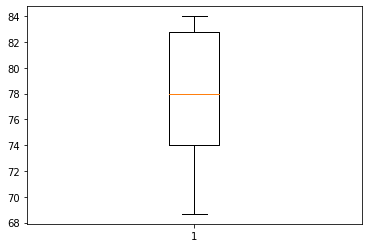

In [578]:
plt.boxplot(rep_5['Crossing'])
plt.show()

In [575]:
quar(74,82.75)

(60.875, 95.875)

In [576]:
value_ch('Crossing')

68.66666666666667

In [577]:
repla('Crossing')

0     84.000000
1     84.000000
2     79.000000
7     77.000000
22    68.666667
Name: Crossing, dtype: float64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [282]:
rep_2.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,International Reputation
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.0
mean,64.098538,54.935765,60.915940,69.075337,55.068200,64.788263,59.770024,54.248216,63.659794,68.733545,65.212530,65.159397,67.087232,72.980174,65.528945,67.711340,69.478192,67.180809,70.739889,59.534496,66.390960,56.085646,60.199048,64.411578,58.112609,71.358446,55.179223,55.244251,52.108644,16.471848,16.182395,15.835845,16.497224,16.532910,2.0
std,13.712813,20.267963,18.471924,13.292612,19.510521,18.987809,19.885612,19.467704,13.967907,16.147054,15.177078,14.761892,13.977772,5.607995,14.290417,16.682586,11.282120,15.774119,11.145384,19.474317,16.694507,21.818238,20.597523,13.234017,16.692361,7.410524,21.424202,23.491315,23.966480,19.063974,18.307169,17.440716,18.861257,19.490818,0.0
min,19.000000,6.000000,8.000000,12.000000,7.000000,8.000000,6.000000,9.000000,12.000000,10.000000,22.000000,26.000000,14.000000,36.000000,17.000000,11.000000,30.000000,18.000000,27.000000,9.000000,11.000000,10.000000,4.000000,12.000000,11.000000,20.000000,7.000000,9.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,59.000000,41.000000,54.000000,67.000000,43.000000,61.000000,50.000000,42.000000,59.000000,67.000000,55.000000,55.000000,60.000000,70.000000,57.000000,65.000000,64.000000,61.000000,65.000000,53.000000,59.000000,35.000000,51.000000,57.000000,49.000000,68.000000,37.000000,34.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.0
50%,67.000000,60.000000,66.000000,73.000000,61.000000,70.000000,66.000000,58.000000,68.000000,74.000000,67.000000,68.000000,69.000000,73.000000,68.000000,73.000000,71.000000,70.000000,72.000000,66.000000,71.000000,66.000000,68.000000,68.000000,62.000000,72.000000,63.000000,66.000000,61.000000,11.000000,11.000000,11.000000,11.000000,11.000000,2.0
75%,74.000000,71.000000,74.000000,77.000000,70.000000,77.000000,74.000000,70.000000,73.000000,78.000000,76.000000,76.000000,77.000000,77.000000,75.000000,78.000000,76.000000,77.000000,78.000000,73.000000,78.000000,75.000000,75.000000,74.000000,70.000000,76.000000,73.000000,76.000000,74.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.0
max,91.000000,88.000000,93.000000,90.000000,87.000000,92.000000,90.000000,93.000000,87.000000,91.000000,95.000000,96.000000,94.000000,86.000000,96.000000,91.000000,94.000000,96.000000,94.000000,89.000000,93.000000,87.000000,88.000000,87.000000,90.000000,88.000000,88.000000,90.000000,88.000000,86.000000,85.000000,91.000000,86.000000,90.000000,2.0


In [580]:
quar(86.25,93.75)


(75.0, 105.0)

In [581]:
value_ch('Finishing')

78.0

In [582]:
repla('Finishing')

0     95.0
1     94.0
2     87.0
7     93.0
22    78.0
Name: Finishing, dtype: float64

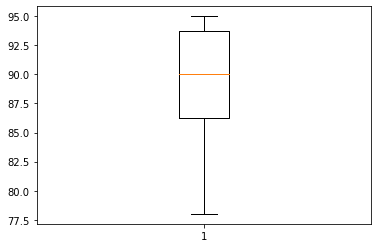

In [583]:
plt.boxplot(rep_5['Finishing'])
plt.show()

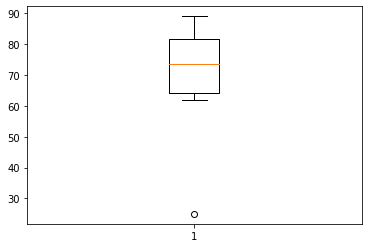

In [584]:
plt.boxplot(rep_5['HeadingAccuracy'])
plt.show()

In [585]:
## rep_2 Heading accuracy
quar(64,81.5)

(37.75, 107.75)

In [586]:
value_ch('HeadingAccuracy')

67.66666666666667

In [587]:
repla('HeadingAccuracy')

0     70.000000
1     89.000000
2     62.000000
7     77.000000
22    67.666667
Name: HeadingAccuracy, dtype: float64

In [589]:
## ShortPassing
quar(79.5,83.5)

(73.5, 89.5)

In [590]:
value_ch('ShortPassing')

78.5

In [591]:
repla('ShortPassing')

0     82.416667
1     81.000000
2     84.000000
7     82.000000
22    78.500000
Name: ShortPassing, dtype: float64

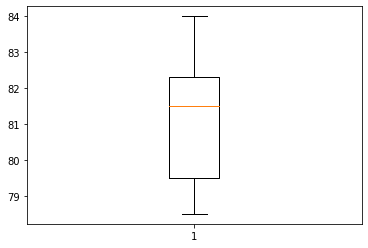

In [592]:
plt.boxplot(rep_5['ShortPassing'])
plt.show()

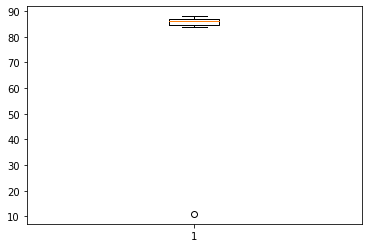

In [593]:
plt.boxplot(rep_5['Volleys'])
plt.show()  # No outliers detected. hence we can leave as it is 

In [594]:
quar(84.5,86.75)

(81.125, 90.125)

In [595]:
value_ch('Volleys')

73.66666666666667

In [596]:
repla('Volleys')

0     86.000000
1     87.000000
2     84.000000
7     88.000000
22    73.666667
Name: Volleys, dtype: float64

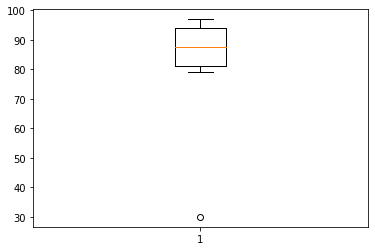

In [597]:
plt.boxplot(rep_5['Dribbling'])
plt.show()

In [598]:
## rep_1='Dribbling'
quar(81,94)

(61.5, 113.5)

In [599]:
value_ch('Dribbling')

79.5

In [600]:
repla('Dribbling')

0     97.0
1     88.0
2     96.0
7     87.0
22    79.5
Name: Dribbling, dtype: float64

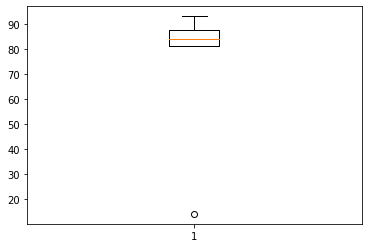

In [601]:
plt.boxplot(rep_5['Curve'])
plt.show() # No outliers detected. hence we can leave as it is 

In [602]:
quar(81.25,87.5)

(71.875, 96.875)

In [603]:
value_ch('Curve')

74.0

In [604]:
repla('Curve')

0     93
1     81
2     88
7     86
22    74
Name: Curve, dtype: int64

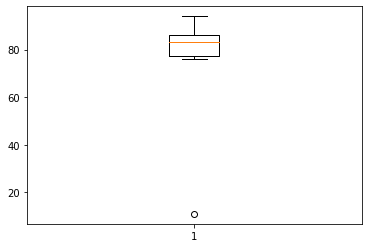

In [605]:
plt.boxplot(rep_5['FKAccuracy'])
plt.show()  # No outliers detected. hence we can leave as it is 

In [606]:
quar(77.5,86.25)

(64.375, 99.375)

In [607]:
value_ch('FKAccuracy')

72.33333333333333

In [608]:
repla('FKAccuracy')

0     94.000000
1     76.000000
2     87.000000
7     84.000000
22    72.333333
Name: FKAccuracy, dtype: float64

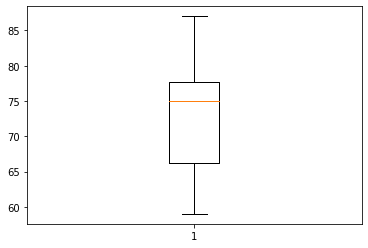

In [609]:
plt.boxplot(rep_5['LongPassing'])
plt.show()  # No outliers detected. hence we can leave as it is 

In [520]:
quar(64.5,82.5)

(37.5, 109.5)

In [521]:
value_ch('LongPassing')

71.90196078431373

In [522]:
repla('LongPassing')

3    51.0
4    91.0
5    83.0
6    88.0
8    77.0
Name: LongPassing, dtype: float64

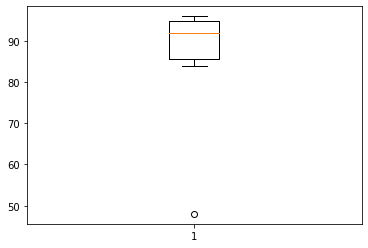

In [610]:
plt.boxplot(rep_5['BallControl'])
plt.show() 

In [611]:
quar(85.5,94.75)

(71.625, 108.625)

In [612]:
value_ch('BallControl')

84.5

In [613]:
repla('BallControl')

0     96.0
1     94.0
2     95.0
7     90.0
22    84.5
Name: BallControl, dtype: float64

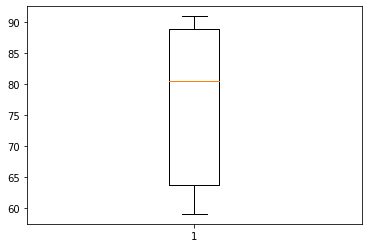

In [614]:
plt.boxplot(rep_5['SprintSpeed'])
plt.show()

In [436]:
quar(62,79)

(36.5, 104.5)

In [437]:
value_ch('SprintSpeed')

69.70873786407768

In [438]:
repla('SprintSpeed')

9     60.0
12    68.0
14    78.0
15    83.0
16    72.0
Name: SprintSpeed, dtype: float64

In [616]:
## We can drop sprint speed or Acceleration as it is highly correlated. It says the same
rep_5.drop(labels='Acceleration',axis=1,inplace=True)
rep_5.head(2)

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,International Reputation
0,RF,84.0,95.0,70.0,82.416667,86.0,97.0,93,94.0,87,96.0,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,5
1,ST,84.0,94.0,89.0,81.000000,87.0,88.0,81,76.0,77,94.0,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,5


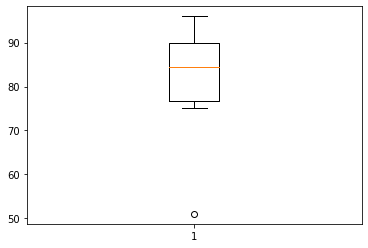

In [617]:
plt.boxplot(rep_5['Agility'])
plt.show()

In [618]:
quar(76.5,90)

(56.25, 110.25)

In [619]:
value_ch('Agility')

80.33333333333333

In [620]:
repla('Agility')

0     91.000000
1     87.000000
2     96.000000
7     82.000000
22    80.333333
Name: Agility, dtype: float64

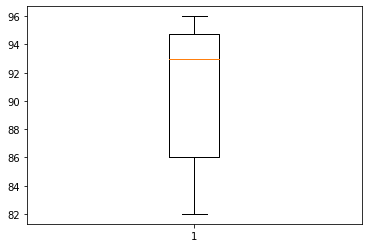

In [623]:
plt.boxplot(rep_5['Reactions'])
plt.show()

In [622]:
quar(82,87)

(74.5, 94.5)

In [529]:
value_ch('Reactions')

84.07843137254902

In [530]:
repla('Reactions')

3    90.0
4    91.0
5    90.0
6    90.0
8    85.0
Name: Reactions, dtype: float64

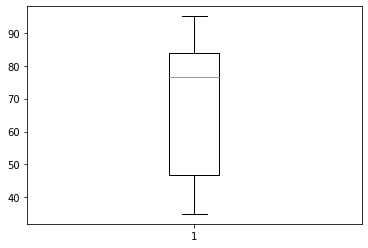

In [624]:
plt.boxplot(rep_5['Balance'])
plt.show()

In [327]:
quar(57,75)

(30.0, 102.0)

In [328]:
value_ch('Balance')

65.97494467402164

In [329]:
repla('Balance')

55    81.0
56    88.0
57    48.0
78    59.0
90    72.0
Name: Balance, dtype: float64

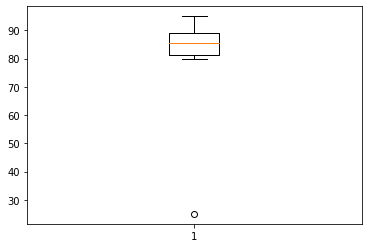

In [625]:
plt.boxplot(rep_5['ShotPower'])
plt.show()

In [626]:
quar(81.25,89)

(69.625, 100.625)

In [627]:
value_ch('ShotPower')

76.83333333333333

In [628]:
repla('ShotPower')

0     85.000000
1     95.000000
2     80.000000
7     86.000000
22    76.833333
Name: ShotPower, dtype: float64

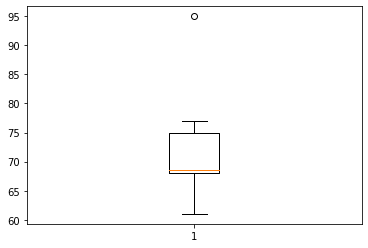

In [629]:
plt.boxplot(rep_5['Jumping'])
plt.show()

In [630]:
quar(68,75)

(57.5, 85.5)

In [631]:
value_ch('Jumping')

73.0

In [632]:
repla('Jumping')

0     68
1     73
2     61
7     69
22    77
Name: Jumping, dtype: int64

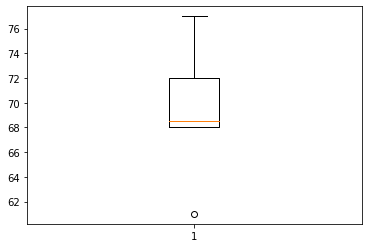

In [633]:
plt.boxplot(rep_5['Jumping'])
plt.show()

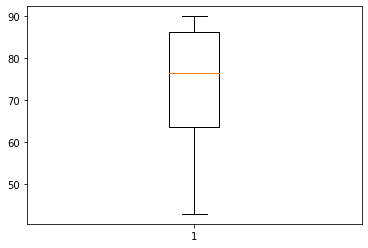

In [634]:
plt.boxplot(rep_5['Stamina'])
plt.show()

In [542]:
quar(65.5,83)

(39.25, 109.25)

In [543]:
value_ch('Stamina')

70.86274509803921

In [544]:
repla('Stamina')

3    43.0
4    90.0
5    83.0
6    89.0
8    84.0
Name: Stamina, dtype: float64

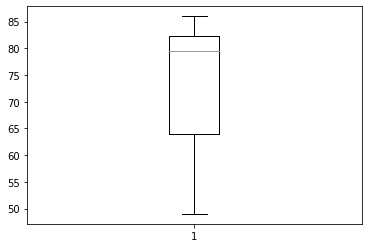

In [635]:
plt.boxplot(rep_5['Strength'])
plt.show()

In [457]:
quar(64,79)

(41.5, 101.5)

In [458]:
value_ch('Strength')

71.12297734627832

In [459]:
repla('Strength')

9     78.0
12    88.0
14    76.0
15    65.0
16    84.0
Name: Strength, dtype: float64

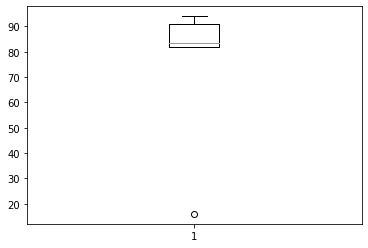

In [636]:
plt.boxplot(rep_5['LongShots'])
plt.show()

In [637]:
quar(82,91)

(68.5, 104.5)

In [638]:
value_ch('LongShots')

75.33333333333333

In [639]:
repla('LongShots')

0     94.000000
1     93.000000
2     82.000000
7     85.000000
22    75.333333
Name: LongShots, dtype: float64

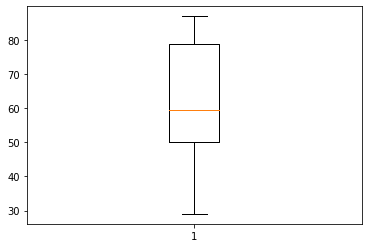

In [640]:
plt.boxplot(rep_5['Aggression'])
plt.show()

In [354]:
quar(,78)

(30.5, 106.5)

In [355]:
value_ch('Aggression')

66.39095955590801

In [356]:
repla('Aggression')

55    61.0
56    58.0
57    35.0
78    73.0
90    58.0
Name: Aggression, dtype: float64

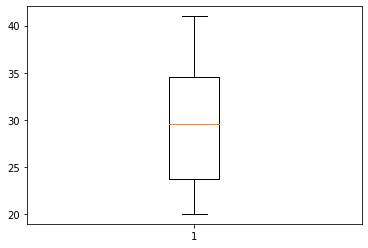

In [641]:
plt.boxplot(rep_5['Interceptions'])
plt.show()

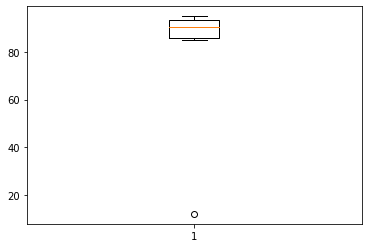

In [642]:
plt.boxplot(rep_5['Positioning'])
plt.show()

In [643]:
quar(86,93.5)

(74.75, 104.75)

In [644]:
value_ch('Positioning')

77.83333333333333

In [645]:
repla('Positioning')

0     94.000000
1     95.000000
2     89.000000
7     92.000000
22    77.833333
Name: Positioning, dtype: float64

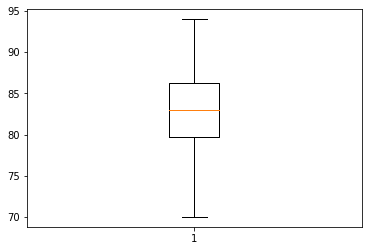

In [646]:
plt.boxplot(rep_5['Vision'])
plt.show()

In [557]:
quar(70.5,86)

(47.25, 109.25)

In [558]:
value_ch('Vision')

76.03921568627452

In [559]:
repla('Vision')

3    68.0
4    94.0
5    89.0
6    92.0
8    63.0
Name: Vision, dtype: float64

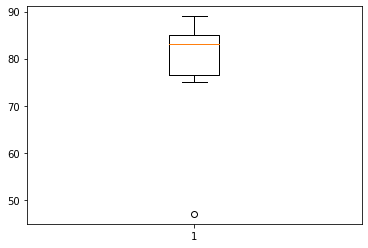

In [647]:
plt.boxplot(rep_5['Penalties'])
plt.show()

In [648]:
quar(76.5,85.)

(63.75, 97.75)

In [649]:
value_ch('Penalties')

77.0

In [650]:
repla('Penalties')

0     75
1     85
2     81
7     85
22    77
Name: Penalties, dtype: int64

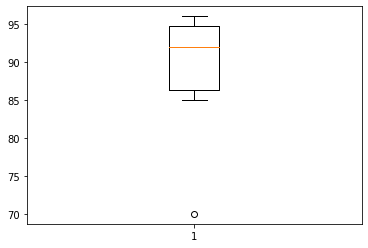

In [651]:
plt.boxplot(rep_5['Composure'])
plt.show()

In [652]:
quar(86.25,94.75)

(73.5, 107.5)

In [653]:
value_ch('Composure')

88.33333333333333

In [654]:
repla('Composure')

0     96.000000
1     95.000000
2     94.000000
7     85.000000
22    88.333333
Name: Composure, dtype: float64

In [ ]:
rep_1.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,International Reputation
count,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.000000,16520.0
mean,48.599576,44.479479,54.531889,60.707070,41.564891,58.608706,45.809806,41.630085,51.546429,61.502078,64.581356,63.519185,60.764762,64.304507,56.270269,65.325786,64.570825,65.281610,45.788680,54.841162,45.773850,48.836077,52.270831,47.479056,57.598421,46.496610,46.981416,45.056659,16.611441,16.394370,16.251271,16.366223,16.712530,1.0
std,17.821362,19.042897,12.458096,9.310836,16.832917,12.063098,17.603186,16.707767,14.910806,8.957726,14.643713,14.127006,7.917893,13.281840,13.121581,10.723415,13.194710,11.814837,18.665871,17.068305,20.291354,18.974068,13.415849,15.137253,10.141305,19.511772,21.272354,20.842720,17.478566,16.682638,16.345748,16.765209,17.720779,0.0
min,5.000000,2.000000,16.000000,32.000000,4.000000,20.000000,6.000000,3.000000,9.000000,31.000000,12.000000,27.000000,39.000000,29.000000,23.000000,36.000000,28.000000,34.000000,3.000000,11.000000,3.000000,2.000000,13.000000,5.000000,28.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,37.000000,29.000000,48.000000,57.000000,30.000000,54.316889,33.000000,30.000000,42.000000,57.231356,57.000000,56.000000,55.000000,57.000000,49.000000,58.000000,58.000000,58.000000,32.000000,43.000000,25.000000,37.000000,43.000000,38.000000,51.000000,29.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.0
50%,53.000000,48.000000,55.000000,62.000000,43.000000,60.000000,47.000000,40.000000,55.000000,62.000000,67.000000,65.000000,61.000000,66.000000,57.000000,65.000000,66.000000,66.000000,50.000000,58.000000,52.000000,54.000000,54.000000,49.000000,58.000000,52.000000,54.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.0
75%,62.000000,61.000000,63.000000,67.000000,55.000000,67.000000,60.000000,55.000000,63.000000,68.000000,75.000000,74.000000,66.000000,74.000000,66.000000,73.000000,73.000000,74.000000,61.000000,68.000000,63.000000,63.000000,63.000000,59.000000,65.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.0
max,91.000000,86.000000,91.000000,87.000000,84.000000,89.000000,89.000000,91.000000,83.000000,88.000000,96.000000,95.000000,82.000000,96.000000,79.000000,94.000000,96.000000,97.000000,87.000000,95.000000,86.000000,88.000000,86.000000,89.000000,86.000000,92.000000,88.000000,86.000000,85.000000,84.000000,88.000000,83.000000,86.000000,1.0


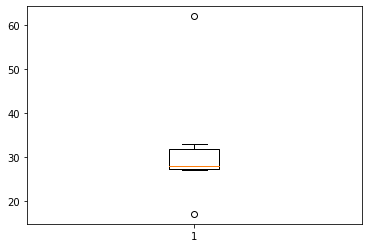

In [655]:
plt.boxplot(rep_5['Marking'])
plt.show()

In [656]:
quar(27.25,31.75)

(20.5, 38.5)

In [657]:
value_ch('Marking')

32.5

In [658]:
repla('Marking')

0     33.000000
1     28.000000
2     27.000000
7     35.083333
22    32.500000
Name: Marking, dtype: float64

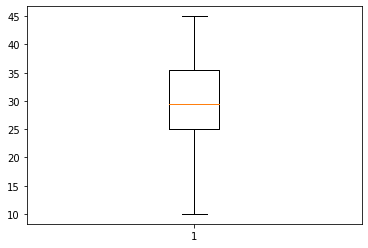

In [659]:
plt.boxplot(rep_5['StandingTackle'])
plt.show()

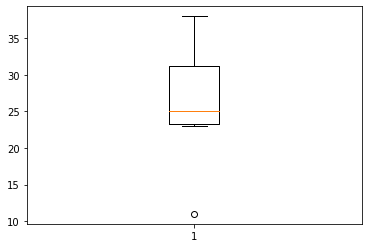

In [660]:
plt.boxplot(rep_5['SlidingTackle'])
plt.show()

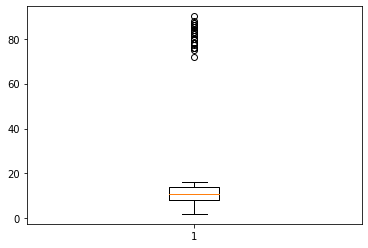

In [486]:
plt.boxplot(rep_3['GKDiving'])
plt.show()

In [661]:
quar(25,35.5)

(9.25, 51.25)

In [662]:
value_ch('SlidingTackle')

25.833333333333332

In [663]:
repla('SlidingTackle')

0     26.0
1     23.0
2     33.0
7     38.0
22    11.0
Name: SlidingTackle, dtype: float64

In [381]:
quar(8,14)

(-1.0, 23.0)

In [382]:
value_ch('GKDiving')

16.471847739888975

In [383]:
repla('GKDiving')

55     8.000000
56     9.000000
57    16.471848
78     7.000000
90     5.000000
Name: GKDiving, dtype: float64

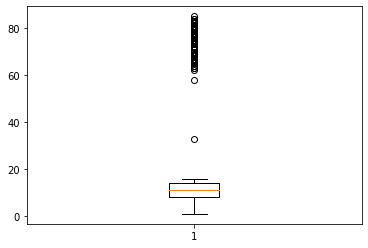

In [384]:
plt.boxplot(rep_2['GKHandling'])
plt.show()

In [386]:
## GK handling and GK diving is highly correlated. We can drop GK handling 
rep_2.drop(labels='GKHandling', axis=1,inplace=True)

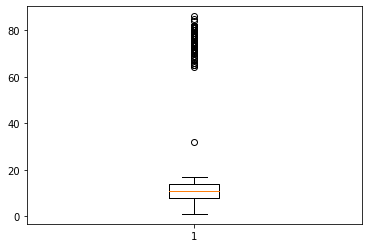

In [387]:
plt.boxplot(rep_2['GKPositioning'])
plt.show()

In [388]:
quar(8,14)

(-1.0, 23.0)

In [389]:
value_ch('GKPositioning')

16.497224425059475

In [390]:
repla('GKPositioning')

55     9.000000
56    12.000000
57    16.497224
78    16.000000
90    14.000000
Name: GKPositioning, dtype: float64

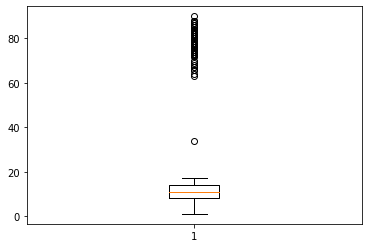

In [391]:
plt.boxplot(rep_2['GKReflexes'])
plt.show()

In [392]:
quar(8,14)

(-1.0, 23.0)

In [393]:
value_ch('GKReflexes')

16.532910388580493

In [394]:
repla('GKReflexes')

55    14.00000
56     9.00000
57    16.53291
78     7.00000
90     8.00000
Name: GKReflexes, dtype: float64

In [395]:
rep_3.count()

Position                    309
Crossing                    309
Finishing                   309
HeadingAccuracy             309
ShortPassing                309
Volleys                     309
Dribbling                   309
Curve                       309
FKAccuracy                  309
LongPassing                 309
BallControl                 309
Acceleration                309
SprintSpeed                 309
Agility                     309
Reactions                   309
Balance                     309
ShotPower                   309
Jumping                     309
Stamina                     309
Strength                    309
LongShots                   309
Aggression                  309
Interceptions               309
Positioning                 309
Vision                      309
Penalties                   309
Composure                   309
Marking                     309
StandingTackle              309
SlidingTackle               309
GKDiving                    309
GKHandli

In [396]:
rep_3

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,International Reputation
9,GK,13,11,15,29,13,12,13,14,26,16,43,60,67,86,49,22,76,41,78,12,34,19,11,70,11,70,27,12,18,86,92,78,88,89,3
12,CB,55,42,92,79,47,53,49,51,70,76,68,68,58,85,54,67,91,66,88,43,89,88,48,52,50,82,90,89,89,6,8,15,5,15,3
14,LDM,68,65,54,86,56,79,49,49,81,80,82,78,82,93,92,71,77,96,76,69,90,92,71,79,54,85,90,91,85,15,12,10,7,10,3
15,LF,82,84,68,87,88,92,88,88,75,92,87,83,91,86,85,82,75,80,65,88,48,32,84,87,86,84,23,20,20,5,4,4,5,8,3
16,ST,75,94,85,80,84,80,78,68,82,84,68,72,71,91,71,88,78,89,84,85,76,35,93,80,90,89,56,36,38,8,10,11,14,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,GK,16,13,12,33,12,13,14,14,32,29,49,39,38,68,50,26,69,26,74,15,34,17,13,57,33,54,18,12,14,72,73,72,72,70,3
4056,LB,71,40,61,70,57,70,69,46,70,72,65,64,74,71,75,66,73,66,66,48,77,69,65,70,58,73,70,67,71,14,7,14,6,6,3
4470,RCM,78,67,60,75,64,69,82,86,74,73,35,33,63,75,60,75,67,60,76,71,68,68,70,77,82,79,66,68,66,15,9,15,14,7,3
6888,CAM,61,62,52,63,58,74,66,57,56,71,76,75,77,62,78,65,77,31,46,57,40,32,67,68,62,67,35,23,22,15,8,12,12,7,3


In [573]:
rep_5.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,International Reputation
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.0
mean,68.666667,78.000000,67.666667,78.500000,73.666667,79.500000,74.00000,72.333333,73.000000,84.500000,78.666667,76.833333,80.333333,90.500000,67.666667,76.833333,73.000000,72.500000,72.666667,75.333333,61.166667,29.666667,77.833333,82.666667,77.000000,88.333333,32.500000,29.166667,25.833333,25.333333,26.166667,29.50000,28.666667,27.666667,5.0
std,26.628306,32.062439,22.957933,12.111978,30.728922,25.129664,29.71195,30.624609,10.139033,18.414668,17.795130,14.579666,16.095548,5.991661,25.073226,25.887577,11.916375,18.008331,15.002222,29.540932,22.031039,8.016649,32.455611,8.041559,15.440207,9.852242,15.372053,11.923366,9.282600,32.598568,29.869159,30.96934,29.750070,30.968802,0.0
min,15.000000,13.000000,25.000000,55.000000,11.000000,30.000000,14.00000,11.000000,59.000000,48.000000,54.000000,59.000000,51.000000,82.000000,35.000000,25.000000,61.000000,43.000000,49.000000,16.000000,29.000000,20.000000,12.000000,70.000000,47.000000,70.000000,17.000000,10.000000,11.000000,6.000000,9.000000,10.00000,9.000000,8.000000,5.0
25%,74.000000,86.250000,64.000000,79.500000,84.500000,81.000000,81.25000,77.500000,66.250000,85.500000,65.000000,63.750000,76.750000,86.000000,46.750000,81.250000,68.000000,63.750000,64.000000,82.000000,50.000000,23.750000,86.000000,79.750000,76.500000,86.250000,27.250000,25.000000,23.250000,7.500000,11.000000,15.00000,14.000000,11.000000,5.0
50%,78.000000,90.000000,73.500000,81.500000,86.000000,87.500000,84.00000,83.000000,75.000000,92.000000,87.500000,80.500000,84.500000,93.000000,76.500000,85.500000,68.500000,76.500000,79.500000,83.500000,59.500000,29.500000,90.500000,83.000000,83.000000,92.000000,28.000000,29.500000,25.000000,11.000000,13.000000,15.00000,14.500000,11.500000,5.0
75%,82.750000,93.750000,81.500000,83.500000,86.750000,94.000000,87.50000,86.250000,77.750000,94.750000,90.500000,89.000000,90.000000,94.750000,83.750000,89.000000,75.000000,86.250000,82.250000,91.000000,78.750000,34.500000,93.500000,86.250000,85.000000,94.750000,31.750000,35.500000,31.250000,23.500000,22.500000,27.00000,28.500000,30.750000,5.0
max,84.000000,95.000000,89.000000,90.000000,88.000000,97.000000,93.00000,94.000000,87.000000,96.000000,94.000000,91.000000,96.000000,96.000000,95.000000,95.000000,95.000000,90.000000,86.000000,94.000000,87.000000,41.000000,95.000000,94.000000,89.000000,96.000000,62.000000,45.000000,38.000000,90.000000,86.000000,91.00000,87.000000,87.000000,5.0


In [667]:
df3=rep_1

In [671]:
df3.append(rep_5)

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKKicking,GKPositioning,GKReflexes,International Reputation,GKHandling
77,LCB,40.000000,42.0,80.000000,70.0,40.000000,59.0,34,30.000000,68,67.0,73,48.000000,81.000000,48.0,50.000000,78.0,77.0,83.0,30.000000,86,86,30.000000,57.0,56,80.000000,92.000000,88,82.0,10.0,12,8.0,12.0,1,NaN
157,RW,83.000000,74.0,64.000000,83.0,76.000000,85.0,86,78.000000,82,83.0,87,85.000000,60.778818,76.0,56.700621,64.0,86.0,70.0,78.000000,62,40,82.000000,83.0,77,81.000000,24.000000,35,33.0,12.0,13,15.0,13.0,1,NaN
158,LCB,40.000000,38.0,83.000000,74.0,44.000000,56.0,45,49.000000,61,70.0,78,77.000000,60.778818,68.0,53.000000,69.0,76.0,73.0,41.000000,88,84,38.000000,42.0,56,71.000000,85.000000,87,82.0,16.0,13,15.0,10.0,1,NaN
159,ST,56.000000,85.0,83.000000,73.0,82.000000,75.0,59,67.000000,47,74.0,83,55.000000,60.778818,55.0,56.700621,84.0,56.0,87.0,82.000000,65,32,83.000000,58.0,77,79.000000,26.000000,27,24.0,8.0,20,19.0,20.0,1,NaN
174,LS,61.000000,83.0,80.000000,78.0,79.000000,78.0,71,56.000000,56,81.0,80,70.000000,82.000000,69.0,56.700621,72.0,72.0,74.0,77.000000,55,40,83.000000,58.0,73,72.000000,43.000000,41,41.0,15.0,7,12.0,10.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,ST,84.000000,94.0,89.000000,81.0,87.000000,88.0,81,76.000000,77,94.0,91,87.000000,96.000000,70.0,95.000000,73.0,88.0,79.0,93.000000,63,29,95.000000,82.0,85,95.000000,28.000000,31,23.0,7.0,15,14.0,11.0,5,11.0
2,LW,79.000000,87.0,62.000000,84.0,84.000000,96.0,88,87.000000,78,95.0,90,96.000000,94.000000,84.0,80.000000,61.0,81.0,49.0,82.000000,56,36,89.000000,87.0,81,94.000000,27.000000,24,33.0,9.0,15,15.0,11.0,5,9.0
7,RS,77.000000,93.0,77.000000,82.0,88.000000,87.0,86,84.000000,64,90.0,75,82.000000,92.000000,83.0,86.000000,69.0,90.0,83.0,85.000000,87,41,92.000000,84.0,85,85.000000,35.083333,45,38.0,27.0,31,33.0,37.0,5,25.0
22,GK,68.666667,78.0,67.666667,78.5,73.666667,79.5,74,72.333333,59,84.5,60,80.333333,84.000000,35.0,76.833333,77.0,43.0,80.0,75.333333,29,30,77.833333,70.0,77,88.333333,32.500000,10,11.0,90.0,91,87.0,87.0,5,86.0


In [674]:
df3.drop(labels=['GKDiving','GKKicking','GKPositioning','GKReflexes'],axis=1,inplace=True)

In [676]:
df3.to_excel('Final ML CLass Football Decision or KNN.xlsx')

In [677]:
uploaded=files.upload()

Saving Final ML CLass Football Decision or KNN.xlsx to Final ML CLass Football Decision or KNN (1).xlsx


In [678]:
df_check=pd.read_excel('Final ML CLass Football Decision or KNN (1).xlsx')

In [681]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16520 entries, 0 to 16519
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                16520 non-null  int64  
 1   Position                  16520 non-null  object 
 2   Crossing                  16520 non-null  int64  
 3   Finishing                 16520 non-null  int64  
 4   HeadingAccuracy           16520 non-null  float64
 5   ShortPassing              16520 non-null  float64
 6   Volleys                   16520 non-null  int64  
 7   Dribbling                 16520 non-null  float64
 8   Curve                     16520 non-null  int64  
 9   FKAccuracy                16520 non-null  int64  
 10  LongPassing               16520 non-null  int64  
 11  BallControl               16520 non-null  float64
 12  SprintSpeed               16520 non-null  int64  
 13  Agility                   16520 non-null  float64
 14  Reacti

In [682]:
df_check.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [684]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16520 entries, 0 to 16519
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Position                  16520 non-null  object 
 1   Crossing                  16520 non-null  int64  
 2   Finishing                 16520 non-null  int64  
 3   HeadingAccuracy           16520 non-null  float64
 4   ShortPassing              16520 non-null  float64
 5   Volleys                   16520 non-null  int64  
 6   Dribbling                 16520 non-null  float64
 7   Curve                     16520 non-null  int64  
 8   FKAccuracy                16520 non-null  int64  
 9   LongPassing               16520 non-null  int64  
 10  BallControl               16520 non-null  float64
 11  SprintSpeed               16520 non-null  int64  
 12  Agility                   16520 non-null  float64
 13  Reactions                 16520 non-null  float64
 14  Balanc

In [686]:
df_check.to_excel('Final Checked ML deccision or KNN data.xlsx')

In [701]:
rep_5.drop(labels=['GKDiving','GKKicking','GKPositioning','GKReflexes','GKHandling'],axis=1,inplace=True)

In [700]:
rep_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 109
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Position                  6 non-null      object 
 1   Crossing                  6 non-null      float64
 2   Finishing                 6 non-null      float64
 3   HeadingAccuracy           6 non-null      float64
 4   ShortPassing              6 non-null      float64
 5   Volleys                   6 non-null      float64
 6   Dribbling                 6 non-null      float64
 7   Curve                     6 non-null      int64  
 8   FKAccuracy                6 non-null      float64
 9   LongPassing               6 non-null      int64  
 10  BallControl               6 non-null      float64
 11  SprintSpeed               6 non-null      int64  
 12  Agility                   6 non-null      float64
 13  Reactions                 6 non-null      int64  
 14  Balance     

In [688]:
rep_1

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,International Reputation
77,LCB,40.0,42.0,80.0,70.0,40,59.0,34,30,68,67.0,73,48.0,81.000000,48.0,50.000000,78.0,77.0,83.000000,30,86,86,30,57.0,56,80.0,92,88,82,1
157,RW,83.0,74.0,64.0,83.0,76,85.0,86,78,82,83.0,87,85.0,60.778818,76.0,56.700621,64.0,86.0,70.000000,78,62,40,82,83.0,77,81.0,24,35,33,1
158,LCB,40.0,38.0,83.0,74.0,44,56.0,45,49,61,70.0,78,77.0,60.778818,68.0,53.000000,69.0,76.0,73.000000,41,88,84,38,42.0,56,71.0,85,87,82,1
159,ST,56.0,85.0,83.0,73.0,82,75.0,59,67,47,74.0,83,55.0,60.778818,55.0,56.700621,84.0,56.0,87.000000,82,65,32,83,58.0,77,79.0,26,27,24,1
174,LS,61.0,83.0,80.0,78.0,79,78.0,71,56,56,81.0,80,70.0,82.000000,69.0,56.700621,72.0,72.0,74.000000,77,55,40,83,58.0,73,72.0,43,41,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18154,CM,34.0,38.0,40.0,49.0,25,42.0,30,34,45,43.0,57,60.0,49.000000,76.0,43.000000,55.0,40.0,47.000000,38,46,46,39,52.0,43,45.0,40,48,47,1
18155,ST,23.0,52.0,52.0,43.0,36,39.0,32,20,25,40.0,39,38.0,40.000000,52.0,41.000000,47.0,43.0,67.000000,42,47,16,46,33.0,43,42.0,22,15,19,1
18156,ST,25.0,40.0,46.0,38.0,38,45.0,38,27,28,44.0,69,50.0,47.000000,58.0,45.000000,60.0,55.0,64.769734,45,32,15,48,43.0,55,41.0,32,13,11,1
18157,RW,44.0,50.0,39.0,42.0,40,51.0,34,32,32,52.0,60,52.0,60.589346,71.0,64.000000,42.0,40.0,48.000000,34,33,22,44,47.0,50,46.0,20,25,27,1


In [702]:
rep_2

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,International Reputation
55,LW,83.0,81.0,72.00000,79.0,85,88.000000,82,68,64,85.000000,96,88.000000,81.000000,81.0,86.00000,64.000000,79.000000,70.000000,78.000000,61.0,34,84.0,82.0,71.000000,78.0,36,32,35,2
56,RW,85.0,75.0,51.00000,85.0,69,92.000000,83,67,79,91.000000,74,90.000000,82.000000,88.0,70.00000,50.000000,78.000000,48.000000,72.000000,58.0,49,83.0,86.0,68.000000,85.0,49,44,35,2
57,GK,20.0,14.0,60.91594,56.0,18,64.788263,15,20,58,68.733545,63,60.000000,86.000000,48.0,67.71134,58.000000,41.000000,68.000000,59.534496,35.0,25,20.0,67.0,58.112609,70.0,28,15,8,2
78,CM,64.0,80.0,86.00000,85.0,74,86.000000,78,75,85,87.000000,70,66.000000,80.000000,59.0,83.00000,85.000000,85.000000,88.000000,80.000000,73.0,78,79.0,85.0,56.000000,82.0,75,77,72,2
90,RCM,84.0,79.0,61.00000,90.0,72,78.000000,89,90,87,84.000000,43,66.000000,78.000000,72.0,78.00000,51.000000,78.000000,72.000000,82.000000,58.0,81,81.0,86.0,83.000000,78.0,69,68,60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13417,CDM,56.0,40.0,58.00000,64.0,44,61.000000,58,50,60,62.000000,56,66.000000,63.000000,63.0,67.71134,64.000000,58.000000,59.000000,39.000000,65.0,60,29.0,60.0,58.112609,64.0,61,62,61,2
13903,LB,68.0,47.0,52.00000,67.0,30,67.000000,72,63,58,64.000000,63,70.000000,72.980174,52.0,58.00000,76.000000,69.000000,72.000000,44.000000,68.0,62,59.0,66.0,58.112609,67.0,48,64,52,2
14081,CB,44.0,40.0,67.00000,62.0,40,40.000000,47,35,59,63.000000,30,67.087232,72.980174,50.0,59.00000,69.478192,67.180809,55.000000,59.534496,69.0,61,21.0,66.0,58.112609,69.0,64,64,57,2
14810,CM,63.0,53.0,49.00000,62.0,46,54.000000,66,63,61,63.000000,37,56.000000,64.000000,56.0,64.00000,52.000000,40.000000,55.000000,59.000000,53.0,50,56.0,62.0,60.000000,74.0,50,58,55,2


In [703]:
rep_3

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,International Reputation
9,GK,63.304207,11.0,62.76699,73.540453,13,70.381877,64.579288,14,67.339806,73.563107,60.000000,67,86,49,70.430421,76.0,70.326861,78.0,63.317152,34,19,64.841424,70.0,62.695793,70.000000,27,12,18,3
12,CB,55.000000,42.0,92.00000,79.000000,47,53.000000,49.000000,51,70.000000,76.000000,68.000000,58,85,54,67.000000,91.0,66.000000,88.0,43.000000,89,88,48.000000,52.0,50.000000,82.000000,90,89,89,3
14,LDM,68.000000,65.0,54.00000,86.000000,56,79.000000,49.000000,49,81.000000,80.000000,78.000000,82,93,92,71.000000,77.0,96.000000,76.0,69.000000,90,92,71.000000,79.0,54.000000,85.000000,90,91,85,3
15,LF,82.000000,84.0,68.00000,87.000000,88,92.000000,88.000000,88,75.000000,92.000000,83.000000,91,86,85,82.000000,75.0,80.000000,65.0,88.000000,48,32,84.000000,87.0,86.000000,84.000000,23,20,20,3
16,ST,75.000000,94.0,85.00000,80.000000,84,80.000000,78.000000,68,82.000000,84.000000,72.000000,71,91,71,88.000000,78.0,89.000000,84.0,85.000000,76,35,93.000000,80.0,90.000000,89.000000,56,36,38,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,GK,63.304207,13.0,62.76699,73.540453,12,70.381877,64.579288,14,67.339806,73.563107,39.000000,38,68,50,70.430421,69.0,70.326861,74.0,63.317152,34,17,64.841424,57.0,33.000000,77.702265,18,12,14,3
4056,LB,71.000000,40.0,61.00000,70.000000,57,70.000000,69.000000,46,70.000000,72.000000,64.000000,74,71,75,66.000000,73.0,66.000000,66.0,48.000000,77,69,65.000000,70.0,58.000000,73.000000,70,67,71,3
4470,RCM,78.000000,67.0,60.00000,75.000000,64,69.000000,82.000000,86,74.000000,73.000000,69.708738,63,75,60,75.000000,67.0,60.000000,76.0,71.000000,68,68,70.000000,77.0,82.000000,79.000000,66,68,66,3
6888,CAM,61.000000,62.0,52.00000,63.000000,58,74.000000,66.000000,57,56.000000,71.000000,75.000000,77,62,78,65.000000,77.0,70.326861,46.0,57.000000,40,32,67.000000,68.0,62.000000,67.000000,35,23,22,3


In [704]:
rep_4

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,International Reputation
3,GK,67.803922,13.000000,21,76.862745,13.000000,71.666667,69.823529,19,51.000000,42,58,60,90.000000,43,74.27451,67.000000,43.000000,64,67.529412,38,30,68.196078,68.000000,40.000000,82.333333,15,21,13,4
4,RCM,93.000000,82.000000,55,92.000000,82.000000,86.000000,85.000000,83,91.000000,91,76,79,91.000000,77,91.00000,63.000000,90.000000,75,91.000000,76,61,87.000000,94.000000,79.000000,88.000000,68,58,51,4
5,LF,81.000000,84.000000,61,89.000000,80.000000,95.000000,83.000000,79,83.000000,94,88,95,90.000000,94,82.00000,56.000000,83.000000,66,80.000000,54,41,87.000000,89.000000,86.000000,91.000000,34,27,22,4
6,RCM,86.000000,72.000000,55,93.000000,76.000000,90.000000,85.000000,78,88.000000,93,72,93,90.000000,94,79.00000,68.000000,89.000000,58,82.000000,62,83,79.000000,92.000000,82.000000,84.000000,60,76,73,4
8,RCB,66.000000,60.000000,91,78.000000,66.000000,63.000000,74.000000,72,77.000000,84,75,78,85.000000,66,79.00000,93.000000,84.000000,83,59.000000,88,90,60.000000,63.000000,75.000000,82.000000,87,92,91,4
10,ST,62.000000,91.000000,85,83.000000,89.000000,85.000000,77.000000,86,65.000000,89,78,78,90.000000,78,88.00000,84.000000,78.000000,84,84.000000,80,39,91.000000,77.000000,88.000000,86.000000,34,42,19,4
11,LCM,88.000000,76.000000,54,92.000000,82.000000,81.000000,86.000000,84,93.000000,90,62,70,89.000000,71,87.00000,70.686275,75.000000,73,92.000000,60,82,79.000000,86.000000,73.000000,85.000000,72,79,69,4
13,LCM,84.000000,76.000000,54,93.000000,82.000000,89.000000,82.000000,77,87.000000,94,64,92,90.000000,90,72.00000,64.000000,78.000000,52,75.000000,57,50,89.000000,92.000000,75.000000,93.000000,59,53,29,4
17,CAM,82.000000,90.000000,84,83.000000,87.000000,88.000000,84.000000,78,76.000000,90,85,90,90.000000,80,80.00000,90.000000,83.000000,62,82.000000,69,35,91.000000,83.000000,79.000000,87.000000,59,47,48,4
19,GK,67.803922,14.000000,13,76.862745,66.686275,71.666667,69.823529,20,71.901961,23,52,61,84.000000,45,74.27451,68.000000,70.862745,70,67.529412,23,15,68.196078,76.039216,68.666667,82.333333,20,18,16,4


In [705]:
rep_5

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,International Reputation
0,RF,84.000000,95.0,70.000000,82.416667,86.000000,97.0,93,94.000000,87,96.0,86,91.000000,95,95,85.000000,68,72,59,94.000000,48,22,94.000000,94,75,96.000000,33.000000,28,26.0,5
1,ST,84.000000,94.0,89.000000,81.000000,87.000000,88.0,81,76.000000,77,94.0,91,87.000000,96,70,95.000000,73,88,79,93.000000,63,29,95.000000,82,85,95.000000,28.000000,31,23.0,5
2,LW,79.000000,87.0,62.000000,84.000000,84.000000,96.0,88,87.000000,78,95.0,90,96.000000,94,84,80.000000,61,81,49,82.000000,56,36,89.000000,87,81,94.000000,27.000000,24,33.0,5
7,RS,77.000000,93.0,77.000000,82.000000,88.000000,87.0,86,84.000000,64,90.0,75,82.000000,92,83,86.000000,69,90,83,85.000000,87,41,92.000000,84,85,85.000000,35.083333,45,38.0,5
22,GK,68.666667,78.0,67.666667,78.500000,73.666667,79.5,74,72.333333,59,84.5,60,80.333333,84,35,76.833333,77,43,80,75.333333,29,30,77.833333,70,77,88.333333,32.500000,10,11.0,5
109,RS,73.000000,86.0,83.000000,79.000000,86.000000,79.0,82,82.000000,73,84.0,59,75.000000,82,39,90.000000,68,61,86,82.000000,84,20,85.000000,79,89,90.000000,28.000000,37,24.0,5


In [709]:
print(rep_1['Crossing'].count())
print(rep_2['Crossing'].count())
print(rep_3['Crossing'].count())
print(rep_4['Crossing'].count())
print(rep_5['Crossing'].count())

16520
1261
309
51
6


In [711]:
a=rep_1.append(rep_2)

In [712]:
b=a.append(rep_3)

In [713]:
c=b.append(rep_4)

In [714]:
result=c.append(rep_5)

In [715]:
result

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,International Reputation
77,LCB,40.000000,42.0,80.000000,70.0,40.000000,59.0,34.0,30.000000,68.0,67.0,73.0,48.000000,81.000000,48.0,50.000000,78.0,77.0,83.0,30.000000,86.0,86,30.000000,57.0,56.0,80.000000,92.000000,88,82.0,1
157,RW,83.000000,74.0,64.000000,83.0,76.000000,85.0,86.0,78.000000,82.0,83.0,87.0,85.000000,60.778818,76.0,56.700621,64.0,86.0,70.0,78.000000,62.0,40,82.000000,83.0,77.0,81.000000,24.000000,35,33.0,1
158,LCB,40.000000,38.0,83.000000,74.0,44.000000,56.0,45.0,49.000000,61.0,70.0,78.0,77.000000,60.778818,68.0,53.000000,69.0,76.0,73.0,41.000000,88.0,84,38.000000,42.0,56.0,71.000000,85.000000,87,82.0,1
159,ST,56.000000,85.0,83.000000,73.0,82.000000,75.0,59.0,67.000000,47.0,74.0,83.0,55.000000,60.778818,55.0,56.700621,84.0,56.0,87.0,82.000000,65.0,32,83.000000,58.0,77.0,79.000000,26.000000,27,24.0,1
174,LS,61.000000,83.0,80.000000,78.0,79.000000,78.0,71.0,56.000000,56.0,81.0,80.0,70.000000,82.000000,69.0,56.700621,72.0,72.0,74.0,77.000000,55.0,40,83.000000,58.0,73.0,72.000000,43.000000,41,41.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,ST,84.000000,94.0,89.000000,81.0,87.000000,88.0,81.0,76.000000,77.0,94.0,91.0,87.000000,96.000000,70.0,95.000000,73.0,88.0,79.0,93.000000,63.0,29,95.000000,82.0,85.0,95.000000,28.000000,31,23.0,5
2,LW,79.000000,87.0,62.000000,84.0,84.000000,96.0,88.0,87.000000,78.0,95.0,90.0,96.000000,94.000000,84.0,80.000000,61.0,81.0,49.0,82.000000,56.0,36,89.000000,87.0,81.0,94.000000,27.000000,24,33.0,5
7,RS,77.000000,93.0,77.000000,82.0,88.000000,87.0,86.0,84.000000,64.0,90.0,75.0,82.000000,92.000000,83.0,86.000000,69.0,90.0,83.0,85.000000,87.0,41,92.000000,84.0,85.0,85.000000,35.083333,45,38.0,5
22,GK,68.666667,78.0,67.666667,78.5,73.666667,79.5,74.0,72.333333,59.0,84.5,60.0,80.333333,84.000000,35.0,76.833333,77.0,43.0,80.0,75.333333,29.0,30,77.833333,70.0,77.0,88.333333,32.500000,10,11.0,5


In [716]:
16520+1261+309+51+6

18147

In [717]:
result.to_excel('ML Final football.xlsx')